
Sistema de Recomendação de Filmes com Python
Objetivo: Criar um sistema que recomende filmes para usuários com base em seus gostos e avaliações anteriores, utilizando técnicas de filtragem colaborativa.

Habilidades Aprimoradas:

Manipulação de dados
Aprendizado de máquina
Análise de dados
Bibliotecas Úteis:

pandas
numpy
scikit-learn
Etapas:

1. Coleta e Pré-processamento de Dados:

Obter um conjunto de dados de filmes e avaliações de usuários, como o MovieLens Dataset (https://license.umn.edu/product/movielens-database).
Carregar os dados em estruturas de dados adequadas (pandas DataFrames).
Limpar e pré-processar os dados, lidando com valores ausentes, inconsistências e normalização.
2. Treinamento do Modelo de Filtragem Colaborativa:

Implementar um algoritmo de filtragem colaborativa, como o algoritmo Nearest Neighbors (KNN) ou o algoritmo Singular Value Decomposition (SVD).
Dividir o conjunto de dados em treino e teste.
Treinar o modelo de filtragem colaborativa no conjunto de dados de treino.


In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format= '{:,.2f}'.format
%matplotlib inline

personality=pd.read_csv('2018-personality-data.csv')
ratings=pd.read_csv('2018_ratings.csv')

In [453]:
display(ratings.head())
display(ratings[ratings.columns[0]].min())

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.00,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.00,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.00,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.00,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.00,2002-01-07 18:12:02


'005fe8678214011d7f92e51f9a546d40'

,abertura,agradabilidade,estabilidade_emocional,consciencia,extroversao,filme_1,classificação_prevista_1
0,5.00,2.00,3.00,2.50,6.50,77658,4.41
1,7.00,4.00,6.00,5.50,4.00,94959,4.21
2,4.00,3.00,4.50,2.00,2.50,110501,4.87


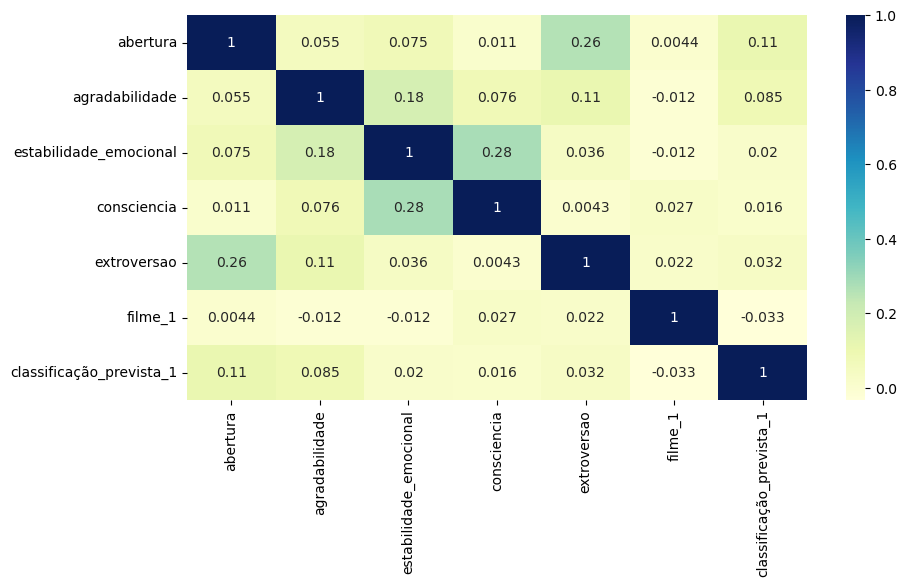

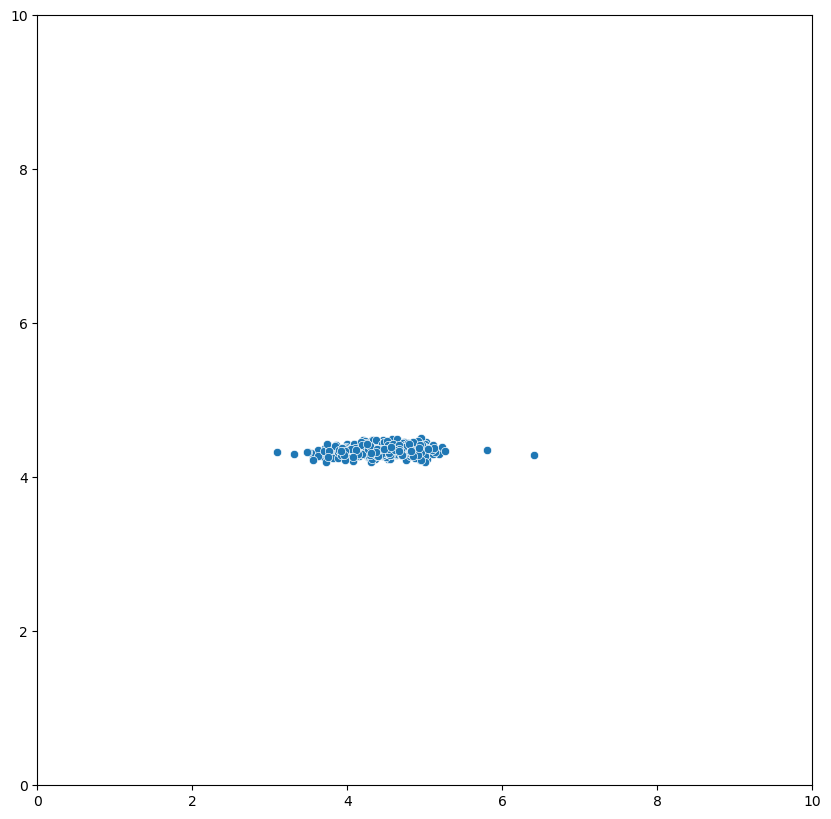

0.13388913411595335
-0.0048453112693918055


In [429]:
colunas_per=personality.columns

personality1=personality.drop(colunas_per[10:32], axis=1)

'''scaler = MinMaxScaler()
personality1.iloc[:,1:6] = scaler.fit_transform(personality.iloc[:,1:6] )'''

personality1=personality1.drop(['userid'], axis=1)
personality1=personality1.drop(colunas_per[6:8], axis=1)
personality1=personality1.drop(colunas_per[32:34], axis=1)

personality1 = personality1.rename(columns={colunas_per[1]: 'abertura', colunas_per[2]: 'agradabilidade',colunas_per[3]:'estabilidade_emocional',colunas_per[4]:'consciencia',colunas_per[5]:'extroversao',colunas_per[8]:'filme_1', colunas_per[9]:'classificação_prevista_1'})

display(personality1.head(3))

plt.figure(figsize=(10,5))
sns.heatmap(personality1.corr(),annot=True,cmap="YlGnBu")
plt.show()

Y = personality1['classificação_prevista_1']
X = personality1.drop('classificação_prevista_1',axis=1)

from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)



from sklearn.linear_model import LinearRegression
modelo_regressao = LinearRegression()
modelo_regressao.fit(x_treino,y_treino)
y_regressao = modelo_regressao.predict(x_teste)

plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values,y=y_regressao)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()


from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste,y_regressao)
print(erro_quadratico_regressao)

from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste,y_regressao)
print(r2_regressao)

In [440]:

filmes_teste=x_teste['filme_1'].unique()

user_info = {
    'abertura': [1]*len(filmes_teste),
    'agradabilidade': [2]*len(filmes_teste),
    'estabilidade_emocional': [5]*len(filmes_teste),
    'consciencia': [7]*len(filmes_teste),
    'extroversao': [1]*len(filmes_teste),
    'filme_1': filmes_teste
}
usuario_teste = pd.DataFrame.from_dict(user_info)

usuario_teste['classificação_prevista_1'] = modelo_regressao.predict(usuario_teste)
#usuario_teste['classificação_prevista_1']=usuario_regressao

display(usuario_teste.head(3))
#usuario_teste=usuario_teste.sort_values(by=colunas_per[8])

,abertura,agradabilidade,estabilidade_emocional,consciencia,extroversao,filme_1,classificação_prevista_1
0,1,2,5,7,1,85774,4.10
1,1,2,5,7,1,94466,4.10
2,1,2,5,7,1,117109,4.09


In [454]:
display(usuario_teste['classificação_prevista_1'].max())
display(usuario_teste['classificação_prevista_1'].min())
recomendacao=usuario_teste[usuario_teste['classificação_prevista_1']==usuario_teste['classificação_prevista_1'].max()]
display((recomendacao['classificação_prevista_1']))


4.13422749259602

4.084909466787496

133   4.13
Name: classificação_prevista_1, dtype: float64